<a href="https://colab.research.google.com/github/mvsakrishna/Assignment/blob/main/Homework_Week2_Abhi_part_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
import math
import scipy
import scipy.ndimage
from skimage import feature
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Calculate Image gradient of tiger image (20 points)

- read and show the tiger image
- show the gradient of x and y, respectively

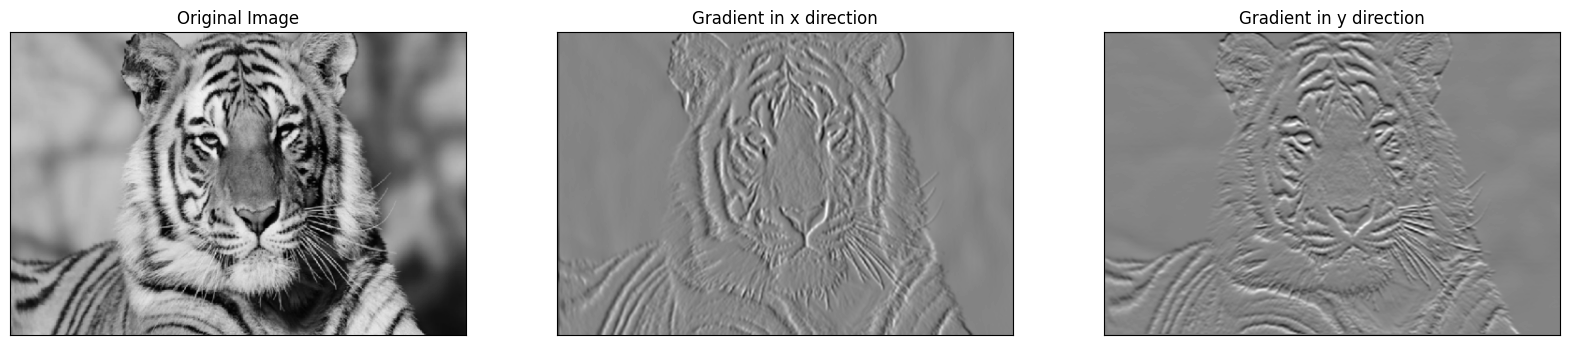

In [4]:
# Read the image
img = cv2.imread('/content/tiger.png', cv2.IMREAD_GRAYSCALE)

# Calculate the image gradient in the x and y directions
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Display the original image
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Display the gradient in x direction
plt.subplot(1, 3, 2), plt.imshow(grad_x, cmap='gray')
plt.title('Gradient in x direction'), plt.xticks([]), plt.yticks([])

# Display the gradient in y direction
plt.subplot(1, 3, 3), plt.imshow(grad_y, cmap='gray')
plt.title('Gradient in y direction'), plt.xticks([]), plt.yticks([])

plt.show()


# 2. Implement Sobel edge detection of bird image (30 points)

- read and show the bird image
- show the gradient of x and y, respectively
- show gradient magnitude
- show results of different thresholds


In [5]:
!pip install opencv-python-headless matplotlib

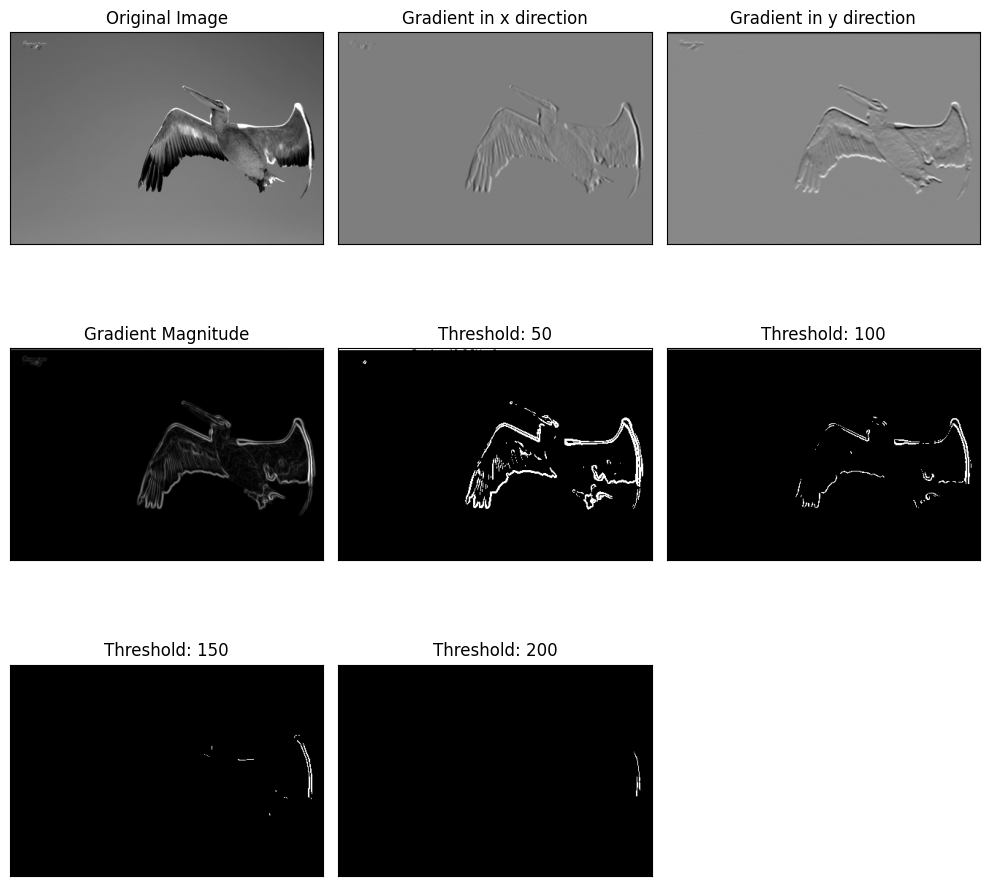

In [7]:
# Read the image
img = cv2.imread('/content/bird.png', cv2.IMREAD_GRAYSCALE)

# Calculate the image gradient in the x and y directions
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

# Calculate the gradient magnitude
mag = np.hypot(grad_x, grad_y)

# Normalize to [0, 255]
normalized_mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply different thresholds
thresholds = [50, 100, 150, 200]
binary_images = [(normalized_mag > t).astype(np.uint8) * 255 for t in thresholds]

# Display the original image
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Display the gradient in x direction
plt.subplot(3, 3, 2), plt.imshow(grad_x, cmap='gray')
plt.title('Gradient in x direction'), plt.xticks([]), plt.yticks([])

# Display the gradient in y direction
plt.subplot(3, 3, 3), plt.imshow(grad_y, cmap='gray')
plt.title('Gradient in y direction'), plt.xticks([]), plt.yticks([])

# Display the gradient magnitude
plt.subplot(3, 3, 4), plt.imshow(normalized_mag, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])

# Display the binary images for different thresholds
for i, binary_image in enumerate(binary_images, start=5):
    plt.subplot(3, 3, i), plt.imshow(binary_image, cmap='gray')
    plt.title(f'Threshold: {thresholds[i-5]}'), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

# 3. Implement LOG edge detection of bird image (20 points)

- read and show the bird image
- show results of LOG edge detection

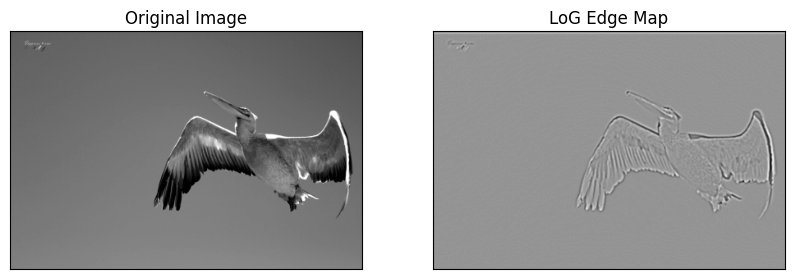

In [8]:
# Read the image
img = cv2.imread('/content/bird.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
smoothed = cv2.GaussianBlur(img, (7, 7), 1)

# Apply Laplacian operator
laplacian = cv2.Laplacian(smoothed, cv2.CV_64F)

# Alternatively, you can apply LoG in one step using the gaussian_laplace function from scipy
# log = gaussian_laplace(img, sigma=1)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Display the LoG edge map
plt.subplot(1, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('LoG Edge Map'), plt.xticks([]), plt.yticks([])

plt.show()

# 4. Implement Canny edge detection of bird image (20 points)

- show results of Canny edge detection

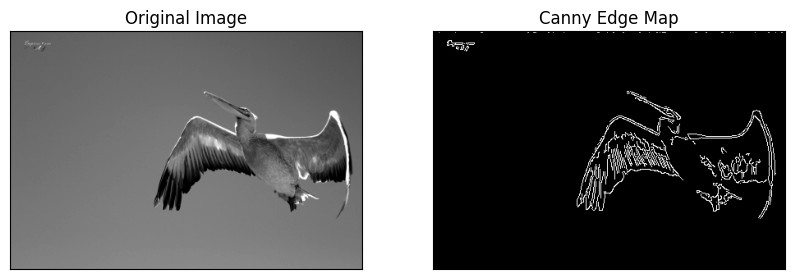

In [9]:
# Read the image
img = cv2.imread('/content/bird.png', cv2.IMREAD_GRAYSCALE)

# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# Display the Canny edge map
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Map'), plt.xticks([]), plt.yticks([])

plt.show()

# 5. Given Gaussian function: $g(x,y) = \frac{1}{\sqrt{2\pi}\sigma} e^{(-\frac{x^2 + y^2}{2\sigma^2})}$ , calculate $\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}$
# (10 points)

(You can search for how to use LaTex to write equations if you don't know how to write.)

Sure, let's calculate the second partial derivatives of the Gaussian function with respect to x and y.

The Gaussian function is given by:

$$g(x,y) = \frac{1}{2\pi\sqrt{\sigma}} e^{(-\frac{x^2 + y^2}{2\sigma^2})}$$

The second partial derivative of this function with respect to x (i.e., $$\frac{\partial^2 g}{\partial x^2}$$) can be calculated as follows:

First, calculate the first derivative with respect to x:

$$\frac{\partial g}{\partial x} = \frac{1}{2\pi\sqrt{\sigma}} e^{(-\frac{x^2 + y^2}{2\sigma^2})} \cdot \frac{-x}{\sigma^2}$$

Then, differentiate again with respect to x:

$$\frac{\partial^2 g}{\partial x^2} = \frac{1}{2\pi\sqrt{\sigma}} e^{(-\frac{x^2 + y^2}{2\sigma^2})} \cdot (\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2})$$

Similarly, the second partial derivative with respect to y (i.e., $$\frac{\partial^2 g}{\partial y^2}$$) is:

$$\frac{\partial^2 g}{\partial y^2} = \frac{1}{2\pi\sqrt{\sigma}} e^{(-\frac{x^2 + y^2}{2\sigma^2})} \cdot (\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2})$$

Adding these two equations together, we get:

$$\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = \frac{1}{2\pi\sqrt{\sigma}} e^{(-\frac{x^2 + y^2}{2\sigma^2})} \cdot ((\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2}) + (\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2}))$$

Simplifying, we get:

$$\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = \frac{1}{2\pi\sqrt{\sigma}} e^{(-\frac{x^2 + y^2}{2\sigma^2})} \cdot (\frac{x^2 + y^2}{\sigma^4} - \frac{2}{\sigma^2})$$

This is the Laplacian of the Gaussian function, which is used in image processing for blob detection and is also known as the Marr-Hildreth operator.

In [12]:
!pip install sympy

In [13]:
# Import the necessary libraries
import sympy as sp

# Define the symbols
x, y, sigma = sp.symbols('x y sigma')

# Define the Gaussian function
g = (1 / (2 * sp.pi * sp.sqrt(sigma))) * sp.exp(-(x**2 + y**2) / (2 * sigma**2))

# Compute the second partial derivatives
g_xx = sp.diff(g, x, x)
g_yy = sp.diff(g, y, y)

# Compute the sum of the second partial derivatives
laplacian_g = g_xx + g_yy

# Display the results
print("Second partial derivative of g with respect to x:")
sp.pprint(g_xx)

print("\nSecond partial derivative of g with respect to y:")
sp.pprint(g_yy)

print("\nLaplacian of g (sum of the second partial derivatives):")
sp.pprint(laplacian_g)

Second partial derivative of g with respect to x:
            ⎛ 2    2⎞  
           -⎝x  + y ⎠  
           ─────────── 
 ⎛     2⎞         2    
 ⎜    x ⎟      2⋅σ     
-⎜1 - ──⎟⋅ℯ            
 ⎜     2⎟              
 ⎝    σ ⎠              
───────────────────────
             5/2       
        2⋅π⋅σ          

Second partial derivative of g with respect to y:
            ⎛ 2    2⎞  
           -⎝x  + y ⎠  
           ─────────── 
 ⎛     2⎞         2    
 ⎜    y ⎟      2⋅σ     
-⎜1 - ──⎟⋅ℯ            
 ⎜     2⎟              
 ⎝    σ ⎠              
───────────────────────
             5/2       
        2⋅π⋅σ          

Laplacian of g (sum of the second partial derivatives):
             ⎛ 2    2⎞               ⎛ 2    2⎞ 
            -⎝x  + y ⎠              -⎝x  + y ⎠ 
            ───────────             ───────────
  ⎛     2⎞         2      ⎛     2⎞         2   
  ⎜    x ⎟      2⋅σ       ⎜    y ⎟      2⋅σ    
  ⎜1 - ──⎟⋅ℯ              ⎜1 - ──⎟⋅ℯ           
  ⎜     2⎟                